In [16]:
from bs4 import BeautifulSoup as bs
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import plotly.express as px
import descartes
import re

In [2]:
all_files = glob.glob("temp/*.csv")

ldf = []

for file in all_files:
    ldf.append(pd.read_csv(file))
    
forumDF = pd.concat(ldf, axis=0, ignore_index=True)
forumDF.to_csv('../saved_gen_df/forumDF_full_df.csv', index=None)

In [37]:
check_df = forumDF[['date', 'board', 'nReplies', 'nViews']].groupby(by='date').describe().reset_index().set_index('date')

In [29]:
check_df = check_df.set_axis([f"{x}{y}" for x, y in test.columns], axis=1, inplace=False)

In [33]:
check_df['s'] = forumDF[['date','nReplies']].groupby(by='date').sum()

In [28]:
def rmSmallWords(s):
    return re.sub(r'\b\w{1,3}\b', '', str(s))

def rmStopWords(xs):
    return [word for word in xs if word not in stopwords.words('english')]

In [31]:
forumDF['title'] = forumDF['title'].astype(str)
forumDF['clean_title'] = forumDF['title'].str.replace("[^a-zA-Z#]", " ")
forumDF['clean_title'] = forumDF['clean_title'].apply(rmSmallWords)
forumDF['clean_title'] = forumDF['clean_title'].str.lower()

In [33]:
import nltk
from nltk.corpus import stopwords

forumDF['tokens'] = forumDF['clean_title'].apply(lambda x: x.split()) # tokenizing
from nltk.stem.porter import *
stemmer = PorterStemmer()

forumDF['tokens']  = forumDF['tokens'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
forumDF['tokens_filtered'] = forumDF['tokens'].apply(rmStopWords)

In [32]:
forumDF

,Unnamed: 0,title,author,nReplies,nViews,lastPost,date,board,clean_title,tokens,tokens_filtered
0,0,Free Agora Referral Link!!! Get you Vendor or ...,TheADC,0,234,"June 23, 2014, 09:43:51 PM",2015-04-25,"('General Category', 'Referral Links')",free agora referral link vendor buyers a...,"[free, agora, referr, link, get, you, vendor, ...","[free, agora, referr, link, get, you, vendor, ..."
1,1,O0O0O0O0O0O0o ♣ ♦ [! ΛGOЯA PHISHING LINK !] ♦ ...,m¡lna2031,1,294,"June 23, 2014, 07:53:55 PM",2015-04-25,"('General Category', 'Referral Links')",phishing link,"[o, o, o, o, o, o, o, go, a, phish, link, o, o...","[o, o, o, o, o, o, o, go, a, phish, link, o, o..."
2,2,O0O0O0O0O0O0o ♣ ♦ [! ΛGOЯA PHISHING LINK !] ♦ ...,m¡lna2031,0,275,"June 23, 2014, 07:52:16 PM",2015-04-25,"('General Category', 'Referral Links')",phishing link,"[o, o, o, o, o, o, o, go, a, phish, link, o, o...","[o, o, o, o, o, o, o, go, a, phish, link, o, o..."
3,3,Sign up for Agora for free now http://agorahoo...,TheADC,8,373,"June 23, 2014, 05:44:42 PM",2015-04-25,"('General Category', 'Referral Links')",sign agora free http agorahooawayyfoe on...,"[sign, up, for, agora, for, free, now, http, a...","[sign, up, for, agora, for, free, now, http, a..."
4,4,Free referal link- sign up now: http://agoraho...,TheADC,9,340,"June 23, 2014, 05:44:35 PM",2015-04-25,"('General Category', 'Referral Links')",free referal link sign http agorahooaway...,"[free, refer, link, sign, up, now, http, agora...","[free, refer, link, sign, up, now, http, agora..."
...,...,...,...,...,...,...,...,...,...,...,...
1508594,9774,______________________________________________...,NaN,0,164,"June 30, 2014, 06:03:01 PM",2015-03-07,"('General Category', 'Referral Links')",...,"[free, activ, link]","[free, activ, link]"
1508595,9775,______________________________________________...,NaN,0,171,"June 30, 2014, 06:02:49 PM",2015-03-07,"('General Category', 'Referral Links')",...,"[free, activ, link]","[free, activ, link]"
1508596,9776,______________________________________________...,NaN,0,139,"June 30, 2014, 06:02:01 PM",2015-03-07,"('General Category', 'Referral Links')",...,"[free, activ, link]","[free, activ, link]"
1508597,9777,______________________________________________...,NaN,0,173,"June 30, 2014, 04:32:08 AM",2015-03-07,"('General Category', 'Referral Links')",...,"[free, activ, link]","[free, activ, link]"


In [43]:
subdf_bef = forumDF.drop(columns=['Unnamed: 0', 'title'])[(forumDF['date'] >= '2014-10-05') & (forumDF['date'] <= '2014-11-06')]
subdf_af = forumDF.drop(columns=['Unnamed: 0', 'title'])[(forumDF['date'] >= '2014-11-06') & (forumDF['date'] <= '2014-12-05')]

,author,nReplies,nViews,lastPost,date,board,clean_title,tokens,tokens_filtered
82474,mito,0,117,"July 02, 2014, 06:05:34 PM",2014-11-13,"('General Category', 'Referral Links')",...,"[free, offici, activ, link]","[free, offici, activ, link]"
82475,mito,0,107,"July 02, 2014, 06:05:23 PM",2014-11-13,"('General Category', 'Referral Links')",...,"[free, offici, activ, link]","[free, offici, activ, link]"
82476,mito,0,149,"July 02, 2014, 06:05:09 PM",2014-11-13,"('General Category', 'Referral Links')",...,"[free, offici, activ, link]","[free, offici, activ, link]"
82477,mito,0,107,"July 02, 2014, 06:04:57 PM",2014-11-13,"('General Category', 'Referral Links')",...,"[free, offici, activ, link]","[free, offici, activ, link]"
82478,mito,0,62,"July 02, 2014, 06:04:48 PM",2014-11-13,"('General Category', 'Referral Links')",...,"[free, offici, activ, link]","[free, offici, activ, link]"
...,...,...,...,...,...,...,...,...,...
1425343,SnareDrum,4,161,"February 14, 2014, 12:12:27 AM",2014-11-15,"('General Category', 'General Discussion')",this could have easily happened here seriously...,"[thi, could, have, easili, happen, here, serio...","[thi, could, easili, happen, serious, empathi]"
1425344,mcphistoman,11,480,"February 13, 2014, 11:46:54 PM",2014-11-15,"('General Category', 'General Discussion')",with silkroad attacked users safe still ...,"[with, silkroad, attack, user, safe, still, ag...","[silkroad, attack, user, safe, still, agora]"
1425345,zxcvblkjhg,0,123,"February 13, 2014, 11:40:51 PM",2014-11-15,"('General Category', 'General Discussion')",refferal link,"[reffer, link]","[reffer, link]"
1425346,zxcvblkjhg,0,95,"February 13, 2014, 11:30:22 PM",2014-11-15,"('General Category', 'General Discussion')",verified agora referrel link,"[verifi, agora, referrel, link]","[verifi, agora, referrel, link]"


In [46]:
all_words_befx = []
for board in subdf_bef['board'].unique():
    all_words_befx.append([board, sum(word_extract(subdf_bef['tokens_filtered']), [])])

[["('General Category', 'Bugs')",
  ['order',
   'preview',
   'say',
   'unfin',
   'order',
   'browser',
   'time',
   'right',
   'middl',
   'make',
   'order',
   'miss',
   'recent',
   'order',
   'set',
   'statu',
   'ship',
   'order',
   'mark',
   'confirm',
   'ship',
   'diusappear',
   'vendor',
   'list',
   'delet',
   'list',
   'doe',
   'noth',
   'review',
   'comment',
   'length',
   'pretti',
   'sure',
   'phish',
   'read',
   'messag',
   'order',
   'keep',
   'reappear',
   'warn',
   'guy',
   'seem',
   'vendor',
   'order',
   'address',
   'delet',
   'confirm',
   'order',
   'statu',
   'abl',
   'leav',
   'multipl',
   'feedback',
   'singl',
   'transact',
   'cant',
   'access',
   'account',
   'pswrd',
   'work',
   'wait',
   'show',
   'sinc',
   'anoth',
   'messag',
   'order',
   'preview',
   'show',
   'total',
   'price',
   'attn',
   'agora',
   'support',
   'cancel',
   'order',
   '#',
   'xvmrmoxl',
   'forum',
   'acct',
   'acce

In [ ]:
all_words_afx = []
for board in subdf_af['board'].unique():
    all_words_afx.append([board, sum(word_extract(subdf_af['tokens_filtered']), [])])

In [ ]:
all_words_afx.tofile('../saved_gen_df/all_words_1moaf', sep=",")
all_words_beffx.tofile('../saved_gen_df/all_words_1mobf', sep=",")

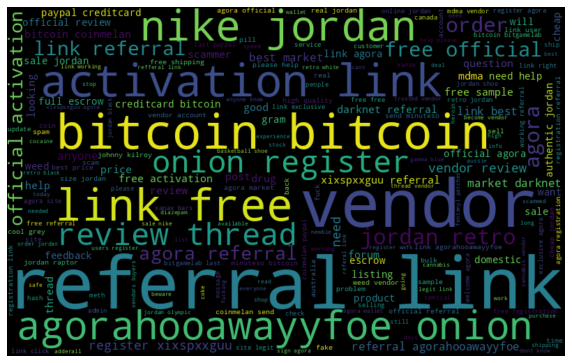

In [36]:
all_words = ' '.join([text for text in forumDF['clean_title'][(forumDF['date'] >= '2014-10-05') 
                                                        & (forumDF['date'] <= '2014-11-06') 
                                                   #    & (forumDF['board'] == "('General Category', 'General Discussion')" )
                                                             ]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

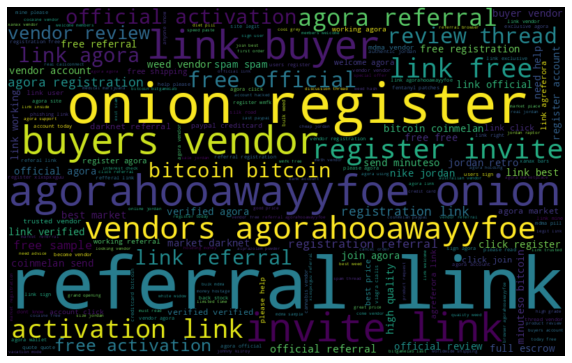

In [37]:
all_words = ' '.join([text for text in forumDF['clean_title'][(forumDF['date'] >= '2014-11-06')
                                                    #    & (forumDF['board'] == "('General Category', 'General Discussion')" ) 
                                                        & (forumDF['date'] <= '2014-12-05')]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [34]:
def word_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        hashtags.append(i)

    return hashtags

HT_regular = word_extract(forumDF['tokens_filtered'][(forumDF['date'] >= '2014-11-06') 
                                                        & (forumDF['date'] <= '2014-12-05')])
HT_regular = sum(HT_regular,[])

             Hashtag  Count
3               link  32579
13            vendor  29327
57             agora  19795
142           referr  16688
0               free  14433
66            regist  10255
15            review  10252
63             buyer   9361
65             onion   8449
1             offici   8436
8            bitcoin   8088
64   agorahooawayyfo   8001
62             invit   7534
49            thread   6372
187             best   5628
2              activ   5598
88             order   5333
266             mdma   5086
339           jordan   5074
83           registr   4925


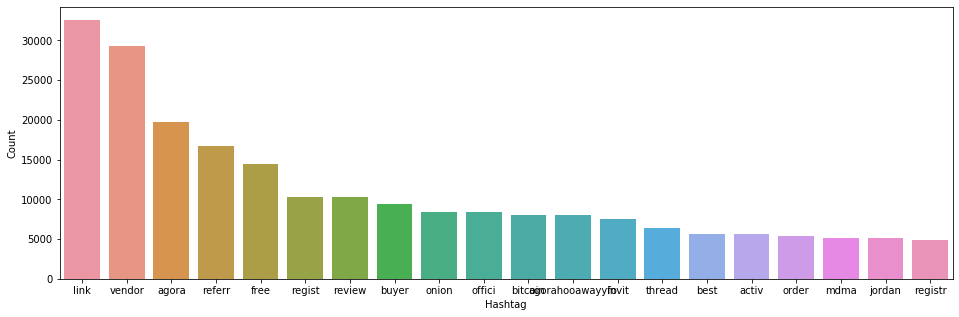

In [35]:
import nltk # for text manipulation

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
print(d)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

      Hashtag  Count
17     vendor   5959
85       link   5239
54      agora   4834
2231   jordan   4337
84     referr   3760
158      free   3155
99    bitcoin   2898
22     review   2479
160    offici   1888
0       order   1740
137      best   1698
129    thread   1655
81       sale   1583
105      need   1471
277    market   1394
97       help   1302
2246    retro   1262
875    regist   1245
146      mdma   1239
455     anyon   1220


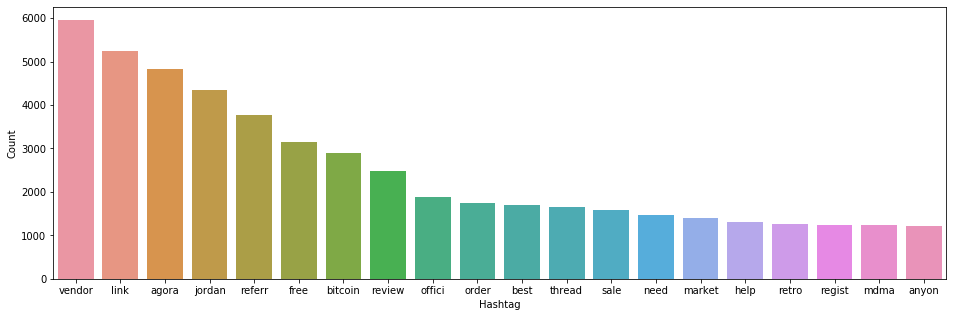

In [39]:
HT_bf = word_extract(forumDF['tokens_filtered'][(forumDF['date'] <= '2014-11-06') 
                                                        & (forumDF['date'] >= '2014-10-05')])
HT_bf = sum(HT_bf,[])

c = nltk.FreqDist(HT_bf)
e = pd.DataFrame({'Hashtag': list(c.keys()),
                  'Count': list(c.values())})

# selecting top 20 most frequent hashtags     
e = e.nlargest(columns="Count", n = 20) 
print(e)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

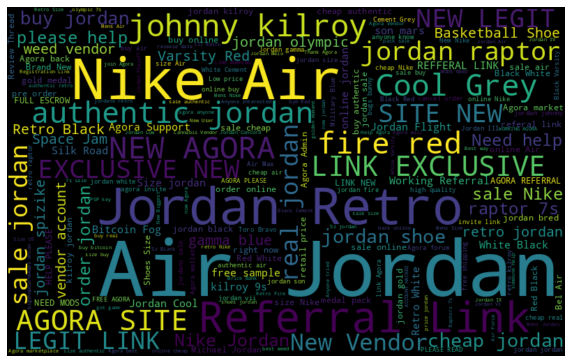

In [107]:

all_words = ' '.join([text for text in forumDF['title'][forumDF['board'] == "('General Category', 'General Discussion')"]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [5]:
test = repliesAndViewsPerDateAndBoard = forumDF[['date', 'board', 'nReplies', 'nViews']].groupby(by=['date', 'board']).describe()

In [4]:
test = test.set_axis([f"{x}{y}" for x, y in test.columns], axis=1, inplace=False)

NameError: name 'test' is not defined

In [100]:
forumDF.board.unique()

array(["('General Category', 'Referral Links')",
       "('General Category', 'Newbie Section ')",
       "('Local forums', 'German')",
       "('General Category', 'Product Offers')",
       "('General Category', 'General Discussion')",
       "('General Category', 'New Features')",
       "('Offtopic', 'Generic randomness')",
       "('General Category', 'Security Discussion')",
       "('Community', 'Philosophy, Economics and Justice')",
       "('Official section', 'News')",
       "('General Category', 'Vendor Discussion')",
       "('Community', 'Drug Safety')", "('Official section', 'Info')",
       "('General Category', 'Access vendor-only forum')",
       "('General Category', 'Product Categories')",
       "('General Category', 'Bugs')",
       "('General Category', 'Vendor discussion')",
       "('General Category', 'Newbie section ')",
       "('General Category', 'Product categories')",
       "('General Category', 'Product offers')",
       "('General Category', 'New feat

In [ ]:
test

In [ ]:
fig, ax1 = plt.subplots( figsize=(20,10))

ax1.set_xlabel('date (d)')
ax1.set_ylabel('ptime Average per day for Agora Market')
ax1.plot(repliesAndViewsPerDateAndBoard.index, repliesAndViewsPerDateAndBoard[('nViews', 'count')])
ax1.tick_params(axis='y')
plt.show()

In [67]:
gapminder = px.data.gapminder()
px.scatter(test.head(1000), x='nRepliesmax',
           y='nViewsmax', animation_frame='date', animation_group="board",
            
           size='nViewscount', color="board",range_x=[1,500000], range_y=[1, 500000], log_y=True, log_x=True)

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of [('nReplies', 'count'), ('nReplies', 'mean'), ('nReplies', 'std'), ('nReplies', 'min'), ('nReplies', '25%'), ('nReplies', '50%'), ('nReplies', '75%'), ('nReplies', 'max'), ('nViews', 'count'), ('nViews', 'mean'), ('nViews', 'std'), ('nViews', 'min'), ('nViews', '25%'), ('nViews', '50%'), ('nViews', '75%'), ('nViews', 'max')] but received: nRepliesmax

In [6]:
forumDF.groupby(by=['date']).describe()

Unnamed: 0                                                      \
                count    mean          std  min      25%     50%      75%   
date                                                                        
2014-01-02      317.0   158.0    91.654242  0.0    79.00   158.0   237.00   
2014-01-09      419.0   209.0   121.099133  0.0   104.50   209.0   313.50   
2014-01-16      531.0   265.0   153.430766  0.0   132.50   265.0   397.50   
2014-01-26      739.0   369.0   213.475213  0.0   184.50   369.0   553.50   
2014-02-03      871.0   435.0   251.580338  0.0   217.50   435.0   652.50   
...               ...     ...          ...  ...      ...     ...      ...   
2015-05-28     5430.0  2714.5  1567.650312  0.0  1357.25  2714.5  4071.75   
2015-05-29     7074.0  3536.5  2042.232235  0.0  1768.25  3536.5  5304.75   
2015-05-31     5989.0  2994.0  1729.019713  0.0  1497.00  2994.0  4491.00   
2015-06-01     5456.0  2727.5  1575.155865  0.0  1363.75  2727.5  4091.25   
2015-06-02     4040.0  2019.5  1166.391872  0.0  1009.75  2019.5  3029.25   

                   nReplies               ...                   nViews  \
               max    count         mean  ...   75%        max   count   
date                                      ...                            
2014-01-02   316.0    317.0     3.757098  ...   4.0      100.0   317.0   
2014-01-09   418.0    419.0     4.248210  ...   5.0      100.0   419.0   
2014-01-16   530.0    531.0     4.623352  ...   5.0      100.0   531.0   
2014-01-26   738.0    739.0     5.649526  ...   6.0      270.0   739.0   
2014-02-03   870.0    871.0     5.900115  ...   6.5      298.0   871.0   
...            ...      ...          ...  ...   ...        ...     ...   
2015-05-28  5429.0   5430.0  2291.144015  ...   9.0  2653452.0  5430.0   
2015-05-29  7073.0   7074.0  1805.225756  ...   8.0  2666740.0  7074.0   
2015-05-31  5988.0   5989.0  2177.288529  ...   8.0  2688949.0  5989.0   
2015-06-01  5455.0   5456.0  2420.452529  ...   9.0  2703569.0  5456.0   
2015-06-02  4039.0   4040.0  3205.072772  ...  10.0  2711560.0  4040.0   

                                                                              
                   mean           std  min     25%    50%     75%        max  
date                                                                          
2014-01-02    67.324921    107.930262  0.0   22.00   40.0   69.00     1181.0  
2014-01-09    73.618138    113.085022  1.0   24.50   44.0   76.00     1379.0  
2014-01-16    82.745763    124.044200  1.0   27.00   49.0   87.00     1529.0  
2014-01-26    97.381597    255.218070  0.0   28.50   51.0   95.50     5948.0  
2014-02-03   104.652124    303.375227  1.0   31.00   55.0  101.50     7914.0  
...                 ...           ...  ...     ...    ...     ...        ...  
2015-05-28  2504.726703  50802.872369  0.0  261.00  441.0  810.00  3139415.0  
2015-05-29  2086.294741  44965.926407  0.0  231.00  398.0  726.00  3157911.0  
2015-05-31  2387.603106  49341.115838  2.0  235.00  408.0  766.00  3180100.0  
2015-06-01  2608.924304  52038.734692  0.0  266.00  454.0  849.25  3197630.0  
2015-06-02  3187.752723  60256.780898  0.0  335.75  525.5  974.75  3208149.0  

[130 rows x 24 columns]

In [7]:
forum_stat = pd.read_csv('../saved_gen_df/forum_stats_df.csv')

In [8]:
forum_stat= forum_stat.set_index('date')

In [31]:
forum_stat

,Unnamed: 0,members,posts,topics,nOnline,new_posts,days_elapsed,new_members,new_topics
date,,,,,,,,,
2014-01-02,0,678,1508,317,3,1508.0,1.0,678.0,317.0
2014-01-09,1,822,2198,418,3,690.0,7.0,144.0,101.0
2014-01-16,2,1034,3026,539,3,828.0,7.0,212.0,121.0
2014-01-26,3,1344,5039,757,3,2013.0,10.0,310.0,218.0
2014-02-03,4,1550,6137,895,3,1098.0,8.0,206.0,138.0
...,...,...,...,...,...,...,...,...,...
2015-06-26,107,56841,16192657,39173,5,137528.0,4.0,188.0,309.0
2015-06-28,108,57227,16417981,60302,5,225324.0,2.0,386.0,21129.0
2015-06-30,109,57710,16625015,75172,5,207034.0,2.0,483.0,14870.0


In [ ]:
test.tail(1000).max()

In [ ]:
print(test['nViewsmax'].max())
print(test['nRepliesmax'].max())
print(test['nViewsmax'].min())
print(test['nRepliesmax'].min())

In [45]:
forumDF = pd.DataFrame(columns=['title', 'author','nReplies', 'nViews','lastPost', 'date', 'board'])
count_e = os.listdir('../data/agora-forums/2014-01-09/index.php')

for entry in os.scandir('../data/agora-forums/2014-01-09/index.php'):
    count = 0
    with open(entry.path) as fp:
        print(entry.path)
        soup = bs(fp, features="html.parser")
        if(len(soup.find_all('body'))>0):
            board = soup.find_all('body')[0].find_all('div', class_="navigate_section")
        else:
            print(entry.path)
        if(len(board[0].find_all('a'))>=3):
            (board0, board1) = (board[0].find_all('a')[1].text, board[0].find_all('a')[2].text)
        else:
            (board0, board1) = (None, None)
            print(len(board[0].find_all('a')))
        if(len(soup.find_all('tbody'))>0):
            topicList = soup.find_all('tbody')[0].find_all('tr')
            
    count += 1
    
print(count)

AttributeError: 'posix.ScandirIterator' object has no attribute 'entries'